In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\ckextended.csv'
data = pd.read_csv(file_path)

In [5]:
data.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [6]:
# Print all column names
print("List of Columns:", data.columns)

# Get and print basic info
print("\nData Info:")
print(data.info())

List of Columns: Index(['emotion', 'pixels', 'Usage'], dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  920 non-null    int64 
 1   pixels   920 non-null    object
 2   Usage    920 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.7+ KB
None


In [7]:
print("\nData Description:")
print(data.describe())

# Check the sample size for each emotion
emotion_counts = data['emotion'].value_counts().sort_index()
print("\nEmotion Counts:")
print(emotion_counts)


Data Description:
          emotion
count  920.000000
mean     4.920652
std      1.882630
min      0.000000
25%      5.000000
50%      6.000000
75%      6.000000
max      7.000000

Emotion Counts:
emotion
0     45
1     59
2     25
3     69
4     28
5     83
6    593
7     18
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt

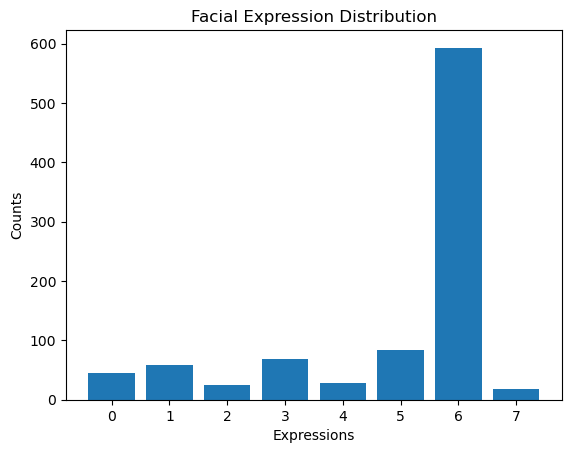

In [10]:
# Plot histogram
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Facial Expression Distribution')
plt.xlabel('Expressions')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Define function to convert 'pixels' string to image array
def parse_pixels(pixels_str):
    pixels = np.array(pixels_str.split(), dtype=int)
    return pixels.reshape(48, 48)

In [12]:
# Randomly select a few samples
sample_indices = np.random.choice(data.index, 5, replace=False)

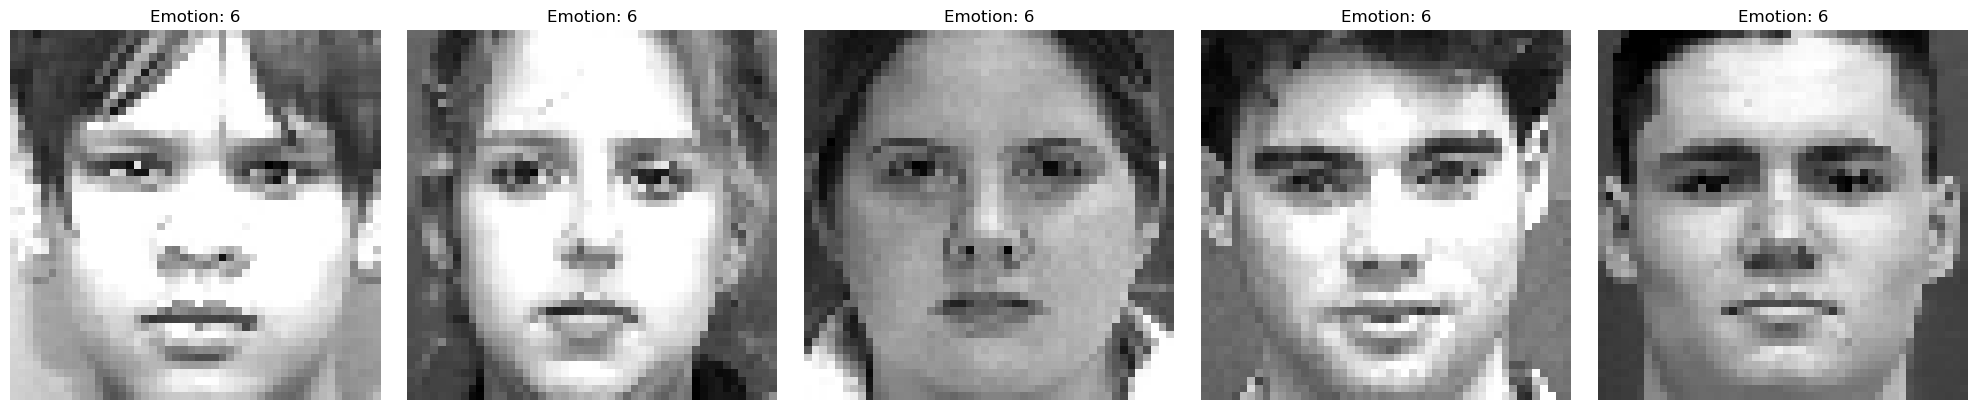

In [13]:
# Plot some samples' images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, index in enumerate(sample_indices):
    image_array = parse_pixels(data.loc[index, 'pixels'])
    axes[i].imshow(image_array, cmap='gray')
    axes[i].set_title(f"Emotion: {data.loc[index, 'emotion']}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Define function to convert 'pixels' string to image array
def parse_pixels(pixels_str):
    pixels = np.array(pixels_str.split(), dtype=int)
    return pixels.reshape(48, 48)

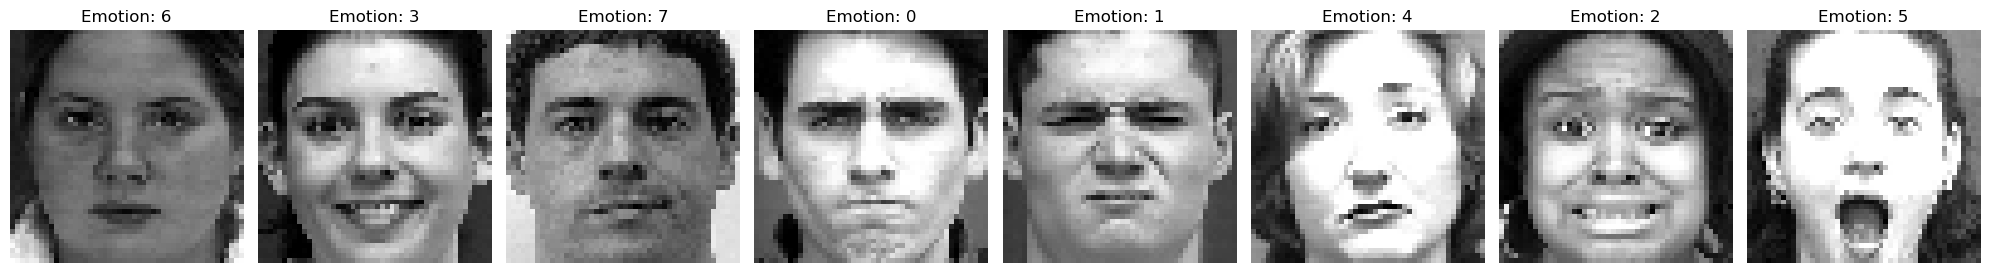

In [15]:
# Get all unique emotion categories
unique_emotions = data['emotion'].unique()

# Plot an example for each category
fig, axes = plt.subplots(1, len(unique_emotions), figsize=(20, 4))

for i, emotion in enumerate(unique_emotions):
    # Choose the first sample from that category
    sample_index = data[data['emotion'] == emotion].index[0]
    image_array = parse_pixels(data.loc[sample_index, 'pixels'])
    
    axes[i].imshow(image_array, cmap='gray')
    axes[i].set_title(f"Emotion: {emotion}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 emotion    0
pixels     0
Usage      0
dtype: int64


In [17]:
# Check for duplicate data
duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [18]:
def parse_pixels(pixels_str):
    pixels = np.array(pixels_str.split(), dtype=int)
    return pixels.reshape(48, 48, 1)  # Assuming images are 48x48 and adding a channel dimension


In [19]:
# Convert pixel data
data['image_array'] = data['pixels'].apply(parse_pixels)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Instantiate ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,    # Random rotation range
    width_shift_range=0.1,  # Horizontal shift range
    height_shift_range=0.1, # Vertical shift range
    zoom_range=0.2,        # Random zoom range
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'    # Fill mode for boundary handling
)

In [25]:
sample_image = np.expand_dims(data['image_array'].iloc[0], axis=0)  # Expand dimension

# Create a generator for augmented data
augment_iter = datagen.flow(sample_image, batch_size=1)

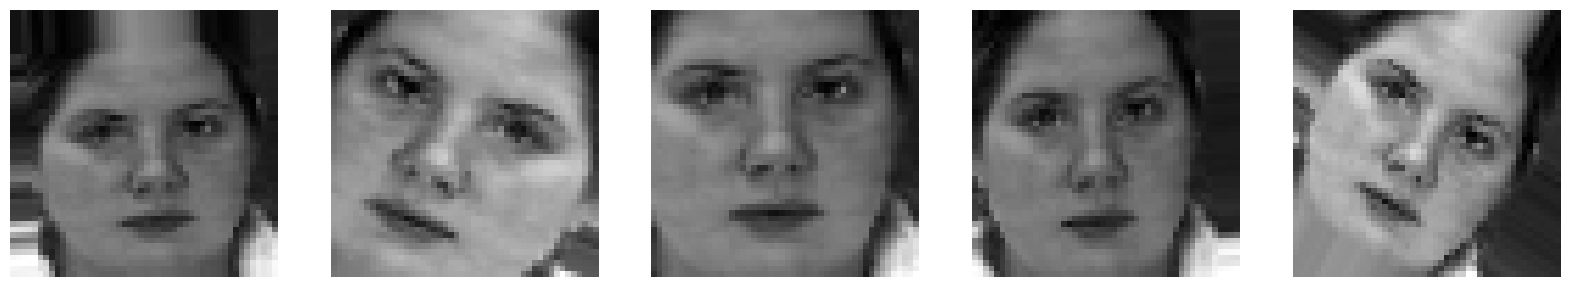

In [26]:
# Visualize some augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    augmented_image = next(augment_iter)[0].reshape(48, 48)  # Remove channel dimension
    axes[i].imshow(augmented_image, cmap='gray')
    axes[i].axis('off')
plt.show()

In [27]:
from sklearn.utils import resample

# Convert pixels column to image arrays
def parse_pixels(pixels_str):
    return np.array(pixels_str.split(), dtype=int).reshape(48, 48, 1)

In [28]:
data['image_array'] = data['pixels'].apply(parse_pixels)

# Get the size of the smallest class
min_class_size = data['emotion'].value_counts().min()

In [29]:
# Perform resampling on each class
resampled_data = pd.DataFrame()
for emotion in data['emotion'].unique():
    emotion_data = data[data['emotion'] == emotion]
    if len(emotion_data) > min_class_size:
        emotion_data = resample(emotion_data, replace=False, n_samples=min_class_size, random_state=42)
    elif len(emotion_data) < min_class_size:
        emotion_data = resample(emotion_data, replace=True, n_samples=min_class_size, random_state=42)
    resampled_data = pd.concat([resampled_data, emotion_data])

In [30]:
# Image augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [31]:
# Apply data augmentation to each class's images
augmented_data = []

for image_array in resampled_data['image_array']:
    image_array = np.expand_dims(image_array, axis=0)  # Shape adjustment
    augment_iter = datagen.flow(image_array, batch_size=1)
    for _ in range(1):  # Augment one sample
        augmented_image = next(augment_iter)[0].reshape(48, 48, 1)
        augmented_data.append(augmented_image)

In [32]:
# Define normalization function
def normalize_pixels(pixels_str):
    pixels = np.array(pixels_str.split(), dtype=int)
    # Normalize pixel values to the range [0, 1]
    normalized_pixels = pixels / 255.0
    return normalized_pixels

# Apply normalization to the pixels column in the dataset
data['normalized_pixels'] = data['pixels'].apply(normalize_pixels)

In [33]:
from sklearn.preprocessing import StandardScaler

# Flatten the normalized pixels and apply standardization
pixel_data = np.vstack(data['normalized_pixels'].values)

scaler = StandardScaler()
standardized_pixels = scaler.fit_transform(pixel_data)

# Reassign the standardized data back to the dataframe
data['standardized_pixels'] = list(standardized_pixels)

In [34]:
from sklearn.model_selection import train_test_split

# Extract image data and labels
X = np.stack(data['image_array'].values)  # Image data
y = data['emotion'].values  # Labels

In [35]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 736
Test set size: 184


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential()

# Input layer
model.add(Input(shape=(48, 48, 1)))

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))  # 7 categories of emotions


In [37]:
# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,655 (1.39 MB)

 Trainable params: 363,655 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define your model
model = Sequential()

# Add a convolutional layer for image data (48x48x1 input)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))  # 48x48 images, 1 channel (grayscale)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D for the dense layer
model.add(Flatten())

# Add a dense layer
model.add(Dense(128, activation='relu'))

# Add output layer with 8 units (for 8 classes) and softmax activation
model.add(Dense(8, activation='softmax'))

# Compile the model (use SparseCategoricalCrossentropy for integer labels)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.3605 - loss: 34.9105 - val_accuracy: 0.6467 - val_loss: 1.3300
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6496 - loss: 1.3035 - val_accuracy: 0.7446 - val_loss: 0.9066
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7541 - loss: 0.8273 - val_accuracy: 0.8315 - val_loss: 0.6648
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8530 - loss: 0.5543 - val_accuracy: 0.8424 - val_loss: 0.5789
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9219 - loss: 0.3698 - val_accuracy: 0.8587 - val_loss: 0.5127
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8947 - loss: 0.3294 - val_accuracy: 0.8750 - val_loss: 0.4316
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9469 - loss: 0.1800 - val_accuracy: 0.8641 - val_loss: 0.4610
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9681 - loss: 0.1227 - val_accuracy: 0.8804 - val_loss: 0

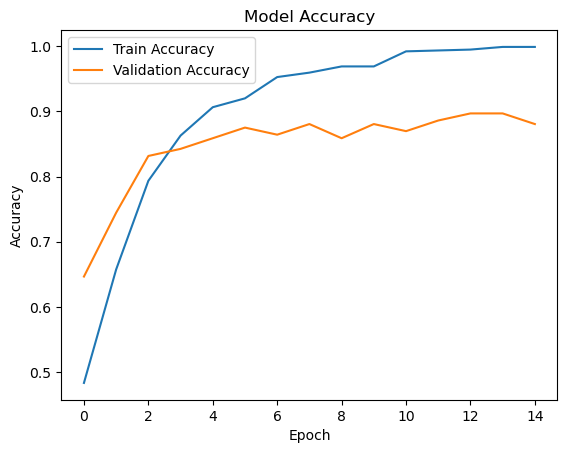

In [42]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

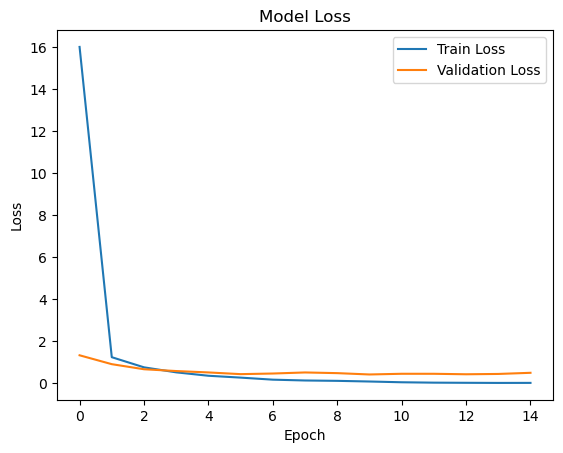

In [43]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8693 - loss: 0.4683
Test Loss: 0.4158394932746887
Test Accuracy: 0.8804348111152649
